# Apply UMAP

Applied to training, test, and validation sets.

In [1]:
import os
import pandas as pd
import sklearn
import umap

import plotnine as gg

In [2]:
def get_umap_viz(file, validation=False, pca=False):
    train_df = pd.read_csv(file)

    if pca:
        features = ("pca")
    else:
        features = ("actin", "DNA", "dist", "nuclear")

    eb_features = [x for x in train_df.columns if x.startswith(features)]
    meta_features = train_df.drop(eb_features, axis='columns').columns.tolist()
    
    meta_df = train_df.drop(eb_features, axis="columns")
    umap_data_df = train_df.loc[:, eb_features]
    
    reducer = umap.UMAP(random_state=123)
    embedding = reducer.fit_transform(umap_data_df)
    
    embedding_df = pd.DataFrame(embedding, columns=['x', 'y'])
    embedding_df = pd.concat([embedding_df, meta_df], axis="columns")
    
    if validation:
        embedding_df = embedding_df.assign(target="unknown")

    p = gg.ggplot(embedding_df,
              gg.aes('x', 'y',
                     color='target')) + \
        gg.geom_point(size = 0.1) + \
        gg.theme_bw() + \
        gg.xlab("x") + \
        gg.ylab("y") 
    
    return embedding_df, p

/Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packages/umap/rp_tree.py:439: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "make_euclidean_tree" failed type inference due to: Cannot unify RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none) and RandomProjectionTreeNode(none, bool, array(float32, 1d, C), float64, RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none), RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none)) for '$14.16', defined at /Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packages/umap/rp_tree.py (446)

File "../../../miniconda3/envs/gancy/lib/python3.7/site-packages/umap/rp_tree.py", line 446:
def make_euclidean_tree(data, indices, rng_state, leaf_size=30):
    <source elided>

        left_node = make_euclidean_tree(data, left_indices, rng_state, leaf_size)
        ^

[1] During: resolving callee type: recursive(type(CPUDispatcher(<fu

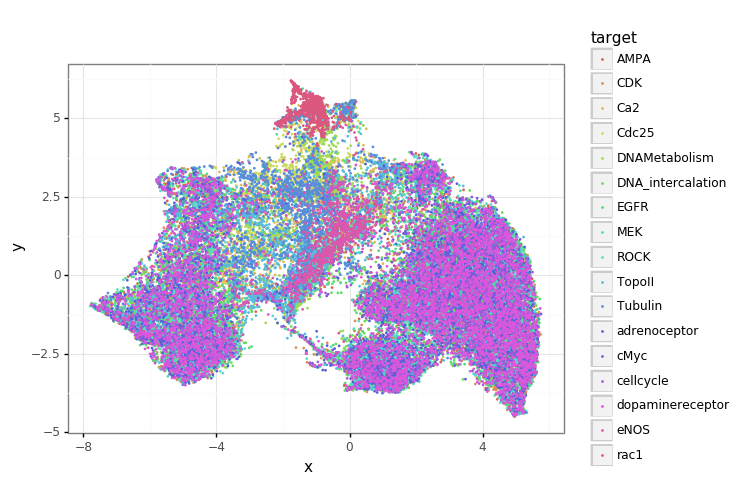

<ggplot: (306402543)>

In [3]:
file = os.path.join("data", "training_feature_select_robust.csv")
embedding_normalize_df, normalize_umap = get_umap_viz(file)

file = os.path.join("figures", "training_umap.png")
gg.ggsave(plot=normalize_umap, filename=file, dpi=400)

normalize_umap

/Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda3/envs/gancy/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/training_pca_umap.png
  warn('Filename: {}'.format(filename))


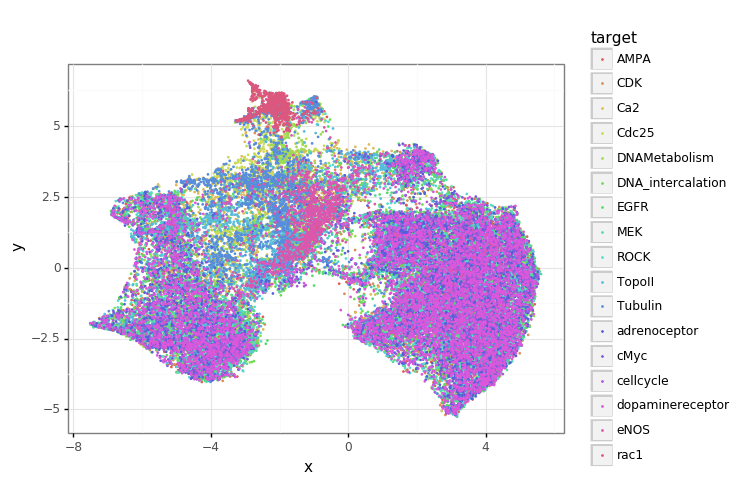

<ggplot: (-9223372036576027427)>

In [4]:
file = os.path.join("data", "pca_train.csv")
embedding_normalize_df, normalize_umap = get_umap_viz(file, pca=True)

file = os.path.join("figures", "training_pca_umap.png")
gg.ggsave(plot=normalize_umap, filename=file, dpi=400)

normalize_umap

/Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packages/umap/umap_.py:328: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../miniconda3/envs/gancy/lib/python3.7/site-packages/umap/umap_.py", line 446:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../miniconda3/envs/gancy/lib/python3.7/site-packages/umap/umap_.py", line 329:
@numba.jit()
def fuzzy_simplicial_set(
^

  state.func_ir.loc))
/Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packag

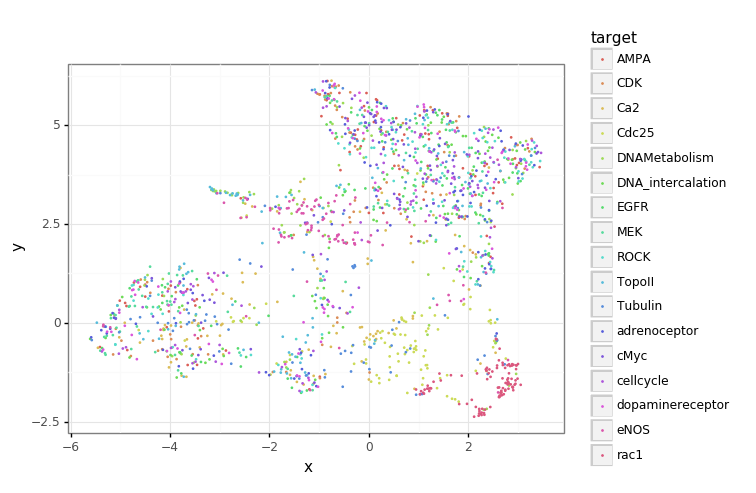

<ggplot: (-9223372036534370514)>

In [5]:
file = os.path.join("data", "testing_feature_select_robust.csv")
test_embedding_df, test_umap = get_umap_viz(file)

file = os.path.join("figures", "testing_umap.png")
gg.ggsave(plot=test_umap, filename=file, dpi=400)

test_umap

/Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda3/envs/gancy/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/gancy/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/validation_umap.png
  warn('Filename: {}'.format(filename))


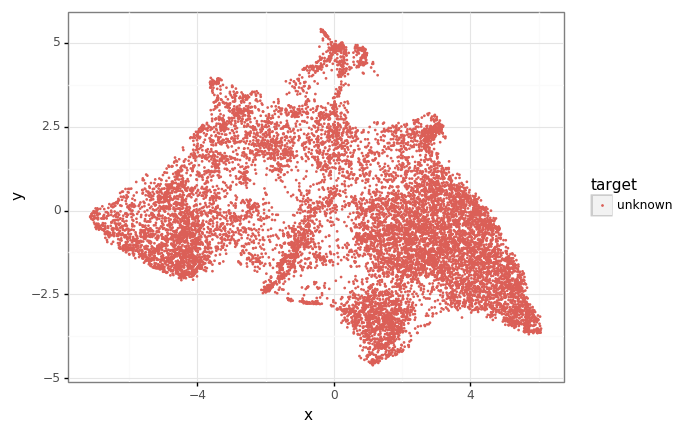

<ggplot: (-9223372036540795816)>

In [6]:
file = os.path.join("data", "validation_feature_select_robust.csv")
val_embedding_df, val_umap = get_umap_viz(file, validation=True)

file = os.path.join("figures", "validation_umap.png")
gg.ggsave(plot=val_umap, filename=file, dpi=400)

val_umap